Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 n

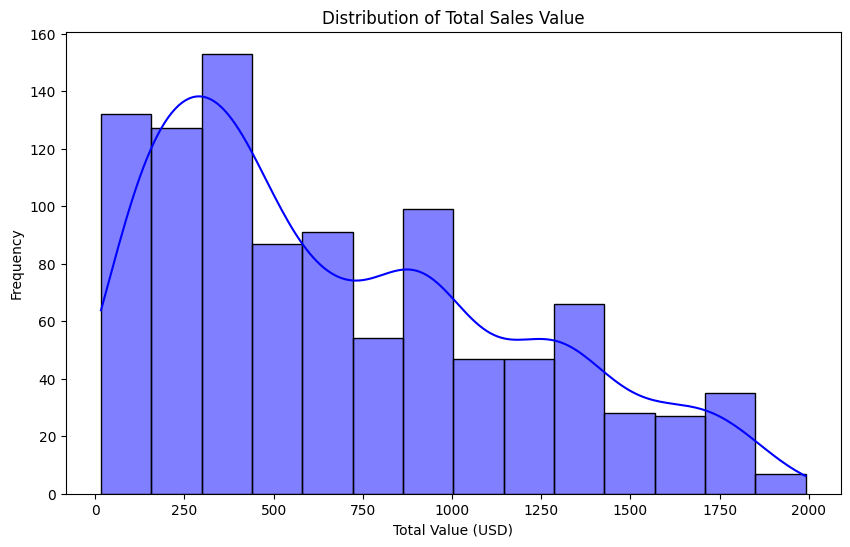

C:\Users\Dell\AppData\Local\Temp\ipykernel_14956\2702074704.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['Region'], palette='viridis')


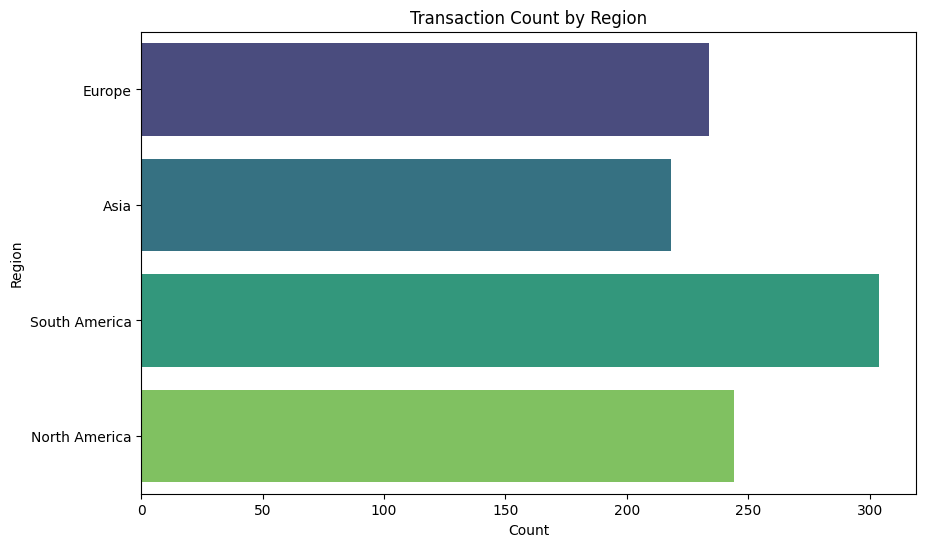

C:\Users\Dell\AppData\Local\Temp\ipykernel_14956\2702074704.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='TotalValue', data=data, palette='Set3')


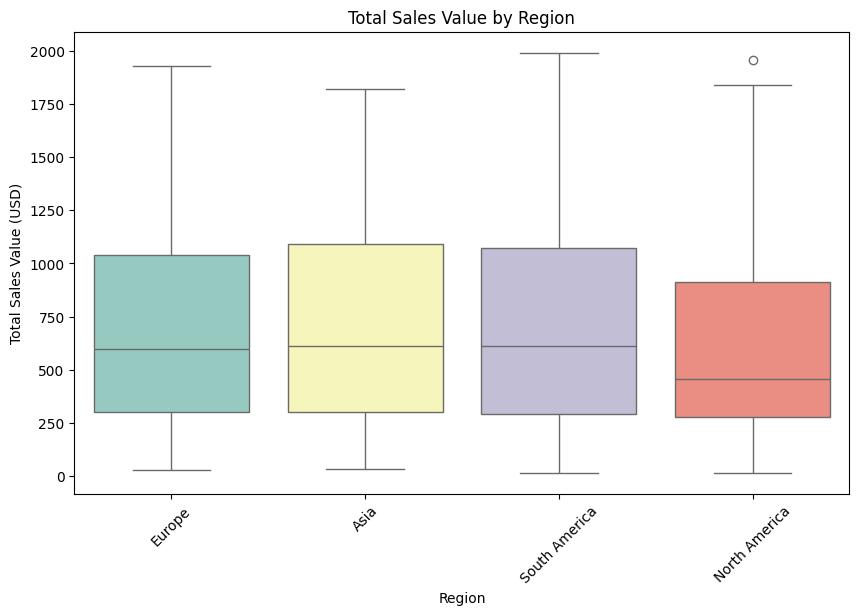

ValueError: could not convert string to float: 'T00001'

<Figure size 800x600 with 0 Axes>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Basic Exploration
print("Customers Info:")
print(customers.info())
print(customers.describe())
print("\nProducts Info:")
print(products.info())
print(products.describe())
print("\nTransactions Info:")
print(transactions.info())
print(transactions.describe())

# Check for Missing and Duplicate Values
print("\nMissing Values:")
print("Customers:")
print(customers.isnull().sum())
print("Products:")
print(products.isnull().sum())
print("Transactions:")
print(transactions.isnull().sum())

print("\nDuplicate Values:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())

# Merge datasets
data = transactions.merge(customers, on='CustomerID', how='inner').merge(products, on='ProductID', how='inner')

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['TotalValue'], kde=True, color='blue')
plt.title('Distribution of Total Sales Value')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(y=data['Region'], palette='viridis')
plt.title('Transaction Count by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=data, palette='Set3')
plt.title('Total Sales Value by Region')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Total Sales Value (USD)')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Insights Generation
region_sales = data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
category_sales = data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
top_customers = data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

print("\nTotal Sales by Region:")
print(region_sales)

print("\nTotal Sales by Product Category:")
print(category_sales)

print("\nTop 10 Customers by Total Sales:")
print(top_customers)

# Save Visualizations
region_sales.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.tight_layout()
plt.savefig('total_sales_by_region.png')
plt.show()
